In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.936EIU_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.936EIU_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
datos_entrenamiento = datos["train"]
datos_pruebas = datos["test"]

In [ ]:
nombres_clases = metadatos.features["label"].names

In [ ]:
#Normalizar datos ent y pruebas con una funcion
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes = imagenes/255
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

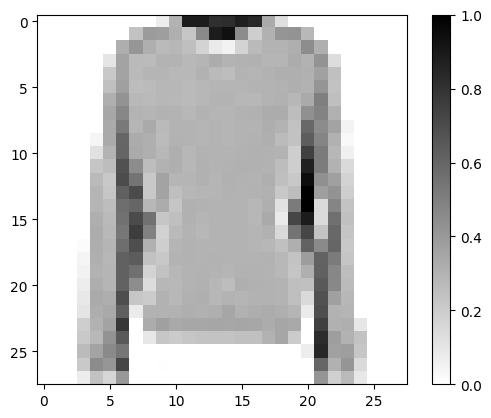

In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

import matplotlib.pyplot as plt

#Mostrarlo en pantalla
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.show()

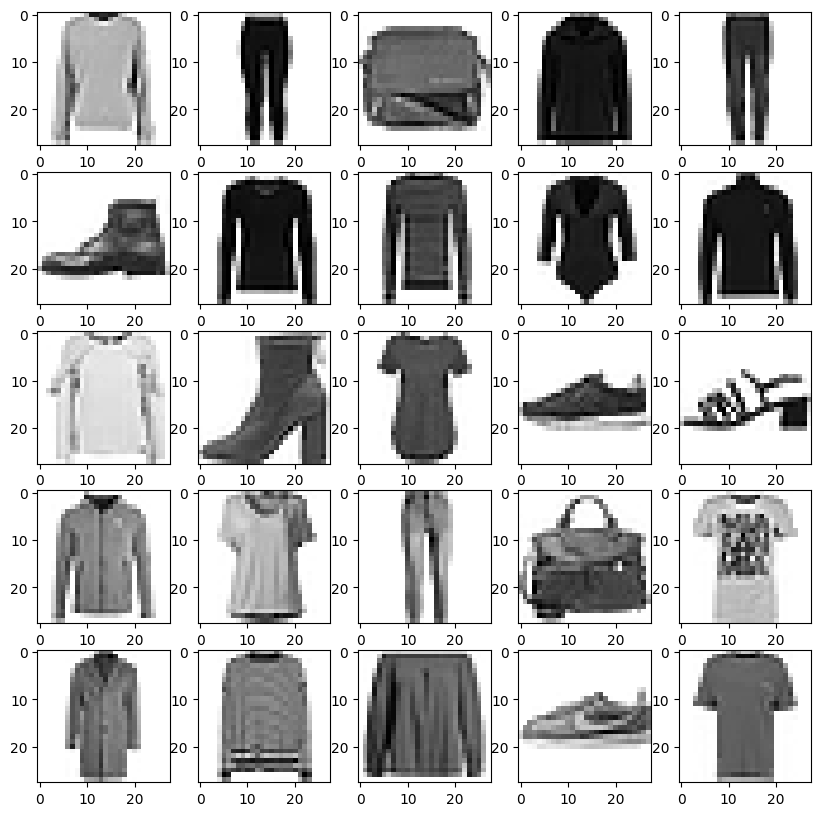

In [ ]:
plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  #Mostrarlo en pantalla
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap=plt.cm.binary)

plt.show()

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
TAMANO_LOTE = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(60000).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenar
entrnamiento = modelo.fit(
    datos_entrenamiento, epochs=50,
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.0975
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.0927
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9674 - loss: 0.0845
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.0762
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0633
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0549
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0562
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0510
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0488
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9828 - loss: 0.0453
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0395
Epoch 12/50
1875/1875 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


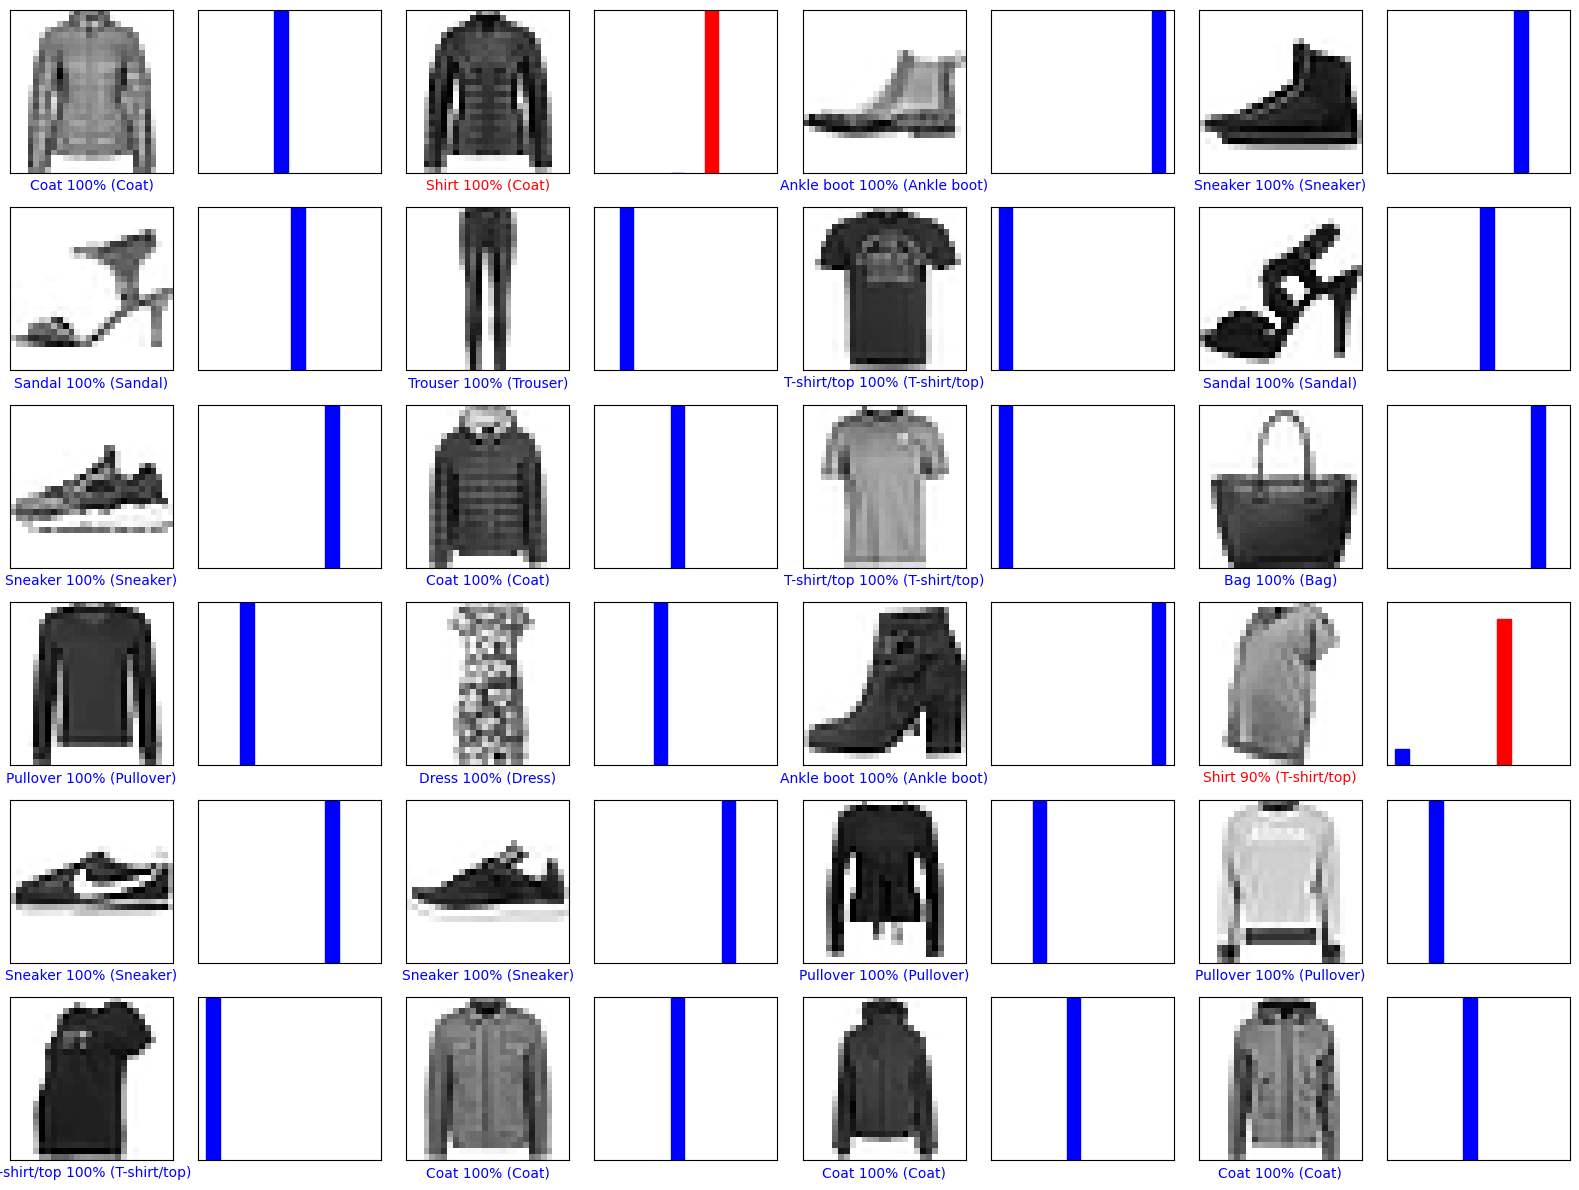

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener las predicciones para el conjunto de pruebas
for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

# Función para graficar una imagen
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[..., 0], cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'  # Correcta
  else:
    color = 'red'  # Incorrecta

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                       100 * np.max(arr_predicciones),
                                       nombres_clases[etiqueta_real]),
             color=color)

# Función para graficar los valores de predicción (barras)
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])  # Limitar el eje y

  etiqueta_prediccion = np.argmax(arr_predicciones)

  # Colorear la barra de la predicción y la etiqueta real
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

# Parámetros de la cuadrícula
filas = 6
columnas = 4
num_imagenes = filas * columnas

# Mostrar la cuadrícula de imágenes y las gráficas de predicción
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2 * columnas, 2 * i + 1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2 * columnas, 2 * i + 2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

plt.tight_layout()
plt.show()
